In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df.head(2)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.dtypes.value_counts()

float64    23
object      9
int64       2
dtype: int64

In [6]:
nv = df.isnull().sum()
nv[nv>0]

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
qualification                 1407
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
no_of_adults                   249
no_of_children                 249
dtype: int64

In [7]:
cat_nan = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtypes=='object']
print(cat_nan)
num_nan = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtypes!='object']
print(num_nan)

['qualification', 'income_level', 'marital_status', 'housing_status', 'employment']
['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']


In [8]:
df[cat_nan].head()

,qualification,income_level,marital_status,housing_status,employment
0,< 12 Years,Below Poverty,Not Married,Own,Not in Labor Force
1,12 Years,Below Poverty,Not Married,Rent,Employed
2,College Graduate,"<= $75,000, Above Poverty",Not Married,Own,Employed
3,12 Years,Below Poverty,Not Married,Rent,Not in Labor Force
4,Some College,"<= $75,000, Above Poverty",Married,Own,Employed


In [11]:
df['qualification'].value_counts()

College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [9]:
for i in cat_nan:
    x = df[i].mode().max()
    df[i].fillna(x,inplace=True)

In [10]:
df[cat_nan].isnull().sum()

qualification     0
income_level      0
marital_status    0
housing_status    0
employment        0
dtype: int64

In [12]:
print(num_nan)

['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']


In [13]:
df['h1n1_worry'].value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [14]:
print(df['h1n1_worry'].mean())
print(df['h1n1_worry'].median())
print(df['h1n1_worry'].mode())

1.6184858162690212
2.0
0    2.0
dtype: float64


In [15]:
for i in num_nan:
    x = df[i].mode().max()
    df[i].fillna(x,inplace=True)

In [16]:
df[num_nan].isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
dtype: int64

In [17]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [18]:
df['unique_id'].nunique()

26707

In [19]:
df.drop('unique_id',inplace=True,axis=1)

In [21]:
print(df.columns)
print(len(df.columns))

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')
33


#### Univariate Analysis

In [23]:
df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

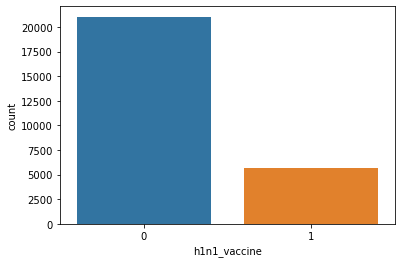

In [25]:
sns.countplot(x=df['h1n1_vaccine'])
plt.show()

### Bi-variate Analysis

In [27]:
df_cat = [i for i in df.columns if df[i].dtypes=='object']
print(df_cat)

['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa']


In [28]:
df[df_cat].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [29]:
df['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

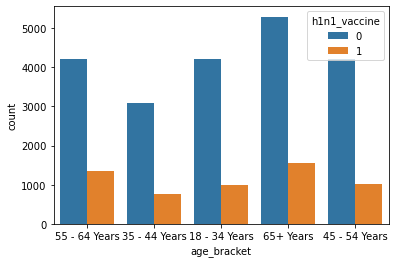

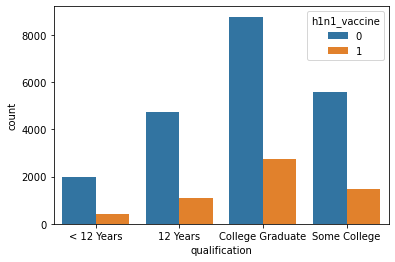

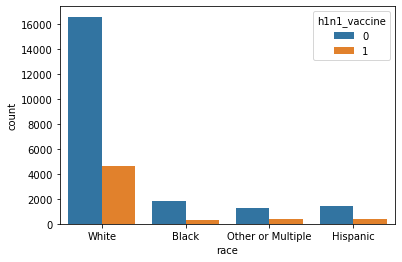

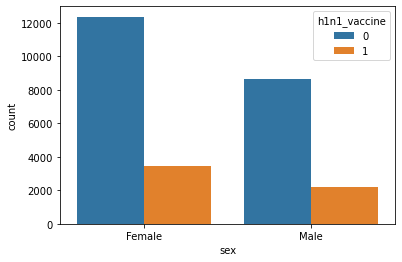

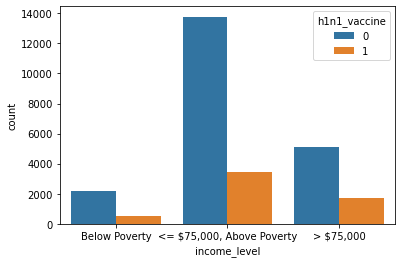

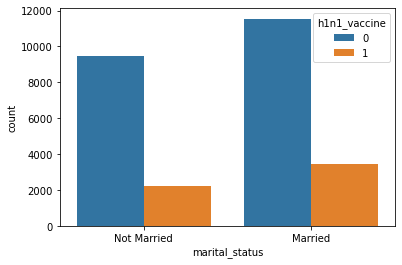

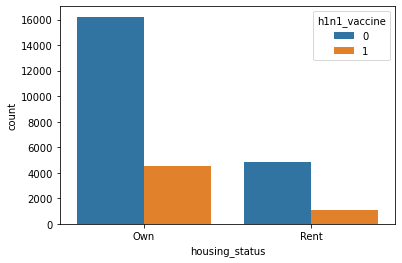

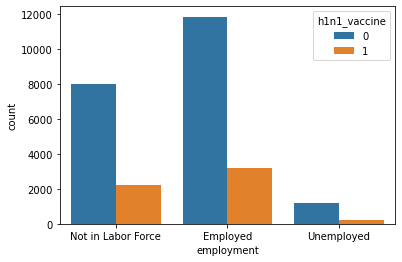

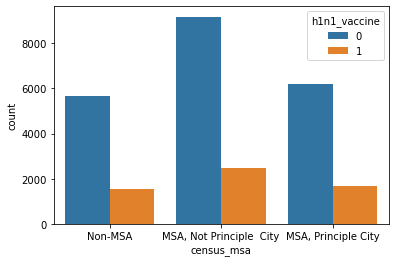

In [30]:
for i in df_cat:
    sns.countplot(x = df[i], hue=df['h1n1_vaccine'])
    plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lb = LabelEncoder()
for i in df_cat:
    df[i] = lb.fit_transform(df[i])

In [34]:
df.dtypes.value_counts()

float64    23
int32       9
int64       1
dtype: int64

In [35]:
corr = df.corr()
corr

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
h1n1_worry,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,0.136957,...,-0.130248,-0.127503,0.046844,-0.028045,0.000714,0.055753,0.004215,-0.016079,0.049441,0.121574
h1n1_awareness,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,0.094135,...,0.150439,-0.067567,-0.018002,-0.108783,-0.108313,-0.118124,-0.060630,0.023866,0.053378,0.117771
antiviral_medication,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.050882,...,-0.110963,-0.006196,0.061054,0.005924,0.056575,0.000885,0.012176,0.044829,0.083090,0.040226
contact_avoidance,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.065589,...,0.001699,-0.112591,0.016870,-0.045367,-0.028909,0.022550,-0.032665,0.017995,0.038977,0.046837
bought_face_mask,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.079887,...,-0.083075,-0.049912,0.038494,0.001622,0.043492,0.027248,-0.003851,0.014191,0.004794,0.070413
wash_hands_frequently,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.086392,...,-0.065468,-0.157033,0.023675,-0.041226,-0.017509,0.001039,-0.016584,0.009367,0.047451,0.074570
avoid_large_gatherings,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.077143,...,-0.108378,-0.055871,0.015420,0.025476,0.047477,0.132775,0.037169,-0.030994,-0.009126,0.018089
reduced_outside_home_cont,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.067136,...,-0.124640,-0.039100,0.034265,0.024708,0.063544,0.138451,0.028633,-0.026542,-0.008937,0.022080
avoid_touch_face,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.087201,...,-0.056717,-0.162693,0.003681,-0.027781,-0.017302,0.029249,0.004741,-0.001233,0.023739,0.070855
dr_recc_h1n1_vacc,0.136957,0.094135,0.050882,0.065589,0.079887,0.086392,0.077143,0.067136,0.087201,1.000000,...,-0.014451,-0.041331,0.027327,-0.020290,0.001887,0.019265,-0.007640,0.009081,0.029398,0.394086


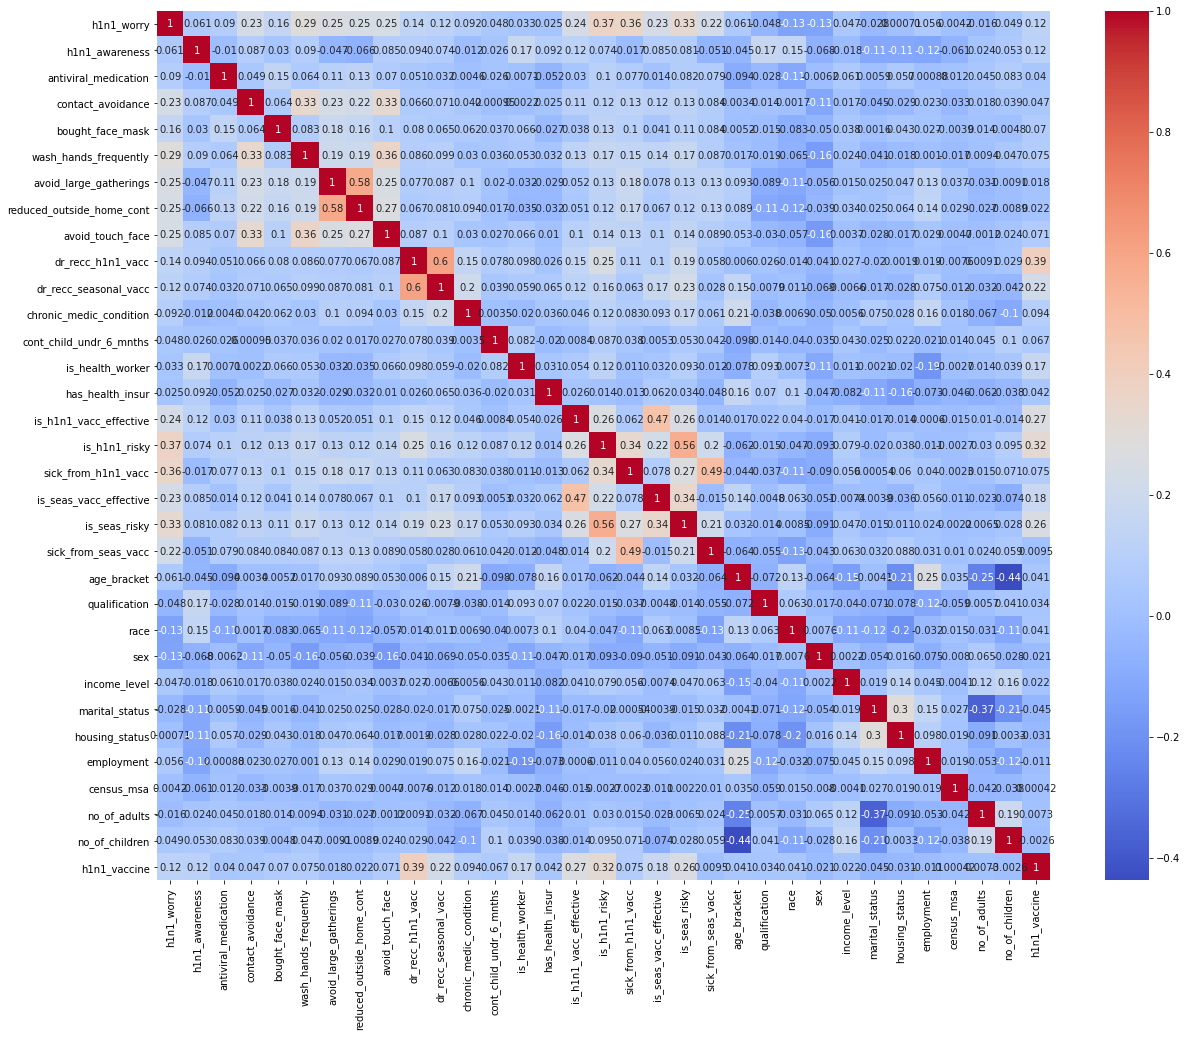

In [36]:
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [38]:
df['no_of_adults'].value_counts()

1.0    14723
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

In [40]:
df['no_of_children'].value_counts()

0.0    18921
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64

#### Outlier Treatment

In [42]:
df.describe(percentiles=[0.1,0.2,0.3,0.5,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,10%,20%,30%,50%,95%,97%,98%,99%,max
h1n1_worry,26707.0,1.619800,0.909016,0.0,0.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0
h1n1_awareness,26707.0,1.261392,0.617047,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
antiviral_medication,26707.0,0.048714,0.215273,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
contact_avoidance,26707.0,0.727749,0.445127,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bought_face_mask,26707.0,0.068933,0.253345,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
wash_hands_frequently,26707.0,0.825888,0.379213,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26707.0,0.357472,0.479264,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
reduced_outside_home_cont,26707.0,0.336279,0.472444,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
avoid_touch_face,26707.0,0.678811,0.466942,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
dr_recc_h1n1_vacc,26707.0,0.202494,0.401866,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [43]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.02))
    return x

In [44]:
df = df.apply(outlier_treatment)

In [45]:
# df.describe(percentiles=[0.1,0.2,0.3,0.5,0.95,0.97,0.98,0.99]).T

In [46]:
x = df.drop('h1n1_vaccine',axis=1)
y = df['h1n1_vaccine']
print(x.shape)
print(y.shape)
print(x.columns)

(26707, 32)
(26707,)
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children'],
      dtype='object')


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,confusion_matrix,classification_report

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17359, 32)
(9348, 32)
(17359,)
(9348,)


In [49]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [50]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 0 0 ... 0 0 1]


In [54]:
def gen_metrics(model,x_train,x_test,y_train,y_test,ypred):
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [56]:
gen_metrics(m1,x_train,x_test,y_train,y_test,ypred_m1)

Training score 0.8362232847514258
Testing score 0.8365425759520753
[[6997  364]
 [1164  823]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7361
           1       0.69      0.41      0.52      1987

    accuracy                           0.84      9348
   macro avg       0.78      0.68      0.71      9348
weighted avg       0.82      0.84      0.82      9348



In [57]:
from sklearn.metrics import roc_auc_score,roc_curve

In [60]:
auc_score = roc_auc_score(y_test,m1.predict_proba(x_test)[:,1])
print('Area Under Curve',auc_score)

Area Under Curve 0.8218019763977331


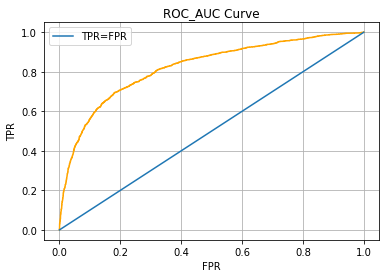

In [64]:
fpr,tpr,thresh = roc_curve(y_test,m1.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

#### CV

In [65]:
from sklearn.model_selection import cross_val_score,KFold

In [67]:
kf = KFold(n_splits=10)
m2 = LogisticRegression(max_iter=1000)
scores = cross_val_score(m2,x,y,cv=kf,scoring='accuracy')
print(scores)
print(scores.mean())

[0.83676526 0.82852864 0.83152377 0.83451891 0.839386   0.83451891
 0.84013478 0.84344569 0.83745318 0.82958801]
0.8355863154957465


### Adding Extra Features

In [58]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine', 'opinion', 'cleanliness'],
      dtype='object')

In [72]:
df['opinion'] = df['is_h1n1_vacc_effective'] + df['is_h1n1_risky'] + \
                  df['sick_from_h1n1_vacc'] + df['is_seas_vacc_effective']+\
                  df['is_seas_risky'] + df['sick_from_seas_vacc']
df['opinion'].value_counts()

16.0    2737
15.0    2534
18.0    2297
14.0    2136
17.0    1960
20.0    1865
19.0    1656
13.0    1438
22.0    1421
21.0    1376
12.0    1368
24.0     910
23.0     856
10.0     669
11.0     669
25.0     578
26.0     526
27.0     305
9.0      297
8.0      254
28.0     222
6.0      206
29.0     162
7.0      142
30.0     123
Name: opinion, dtype: int64

In [73]:
df['precautions'] =  df['antiviral_medication']+ df['contact_avoidance']+\
                        df['bought_face_mask']+df['wash_hands_frequently']+\
                       df['avoid_large_gatherings'] + df['reduced_outside_home_cont']+\
                       df['avoid_touch_face']
df['precautions'].value_counts()

3.0    7331
2.0    4568
5.0    4546
4.0    4335
1.0    2656
0.0    2060
6.0    1040
7.0     171
Name: precautions, dtype: int64

In [74]:
df1 = df.copy()
df1.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine', 'opinion', 'precautions'],
      dtype='object')

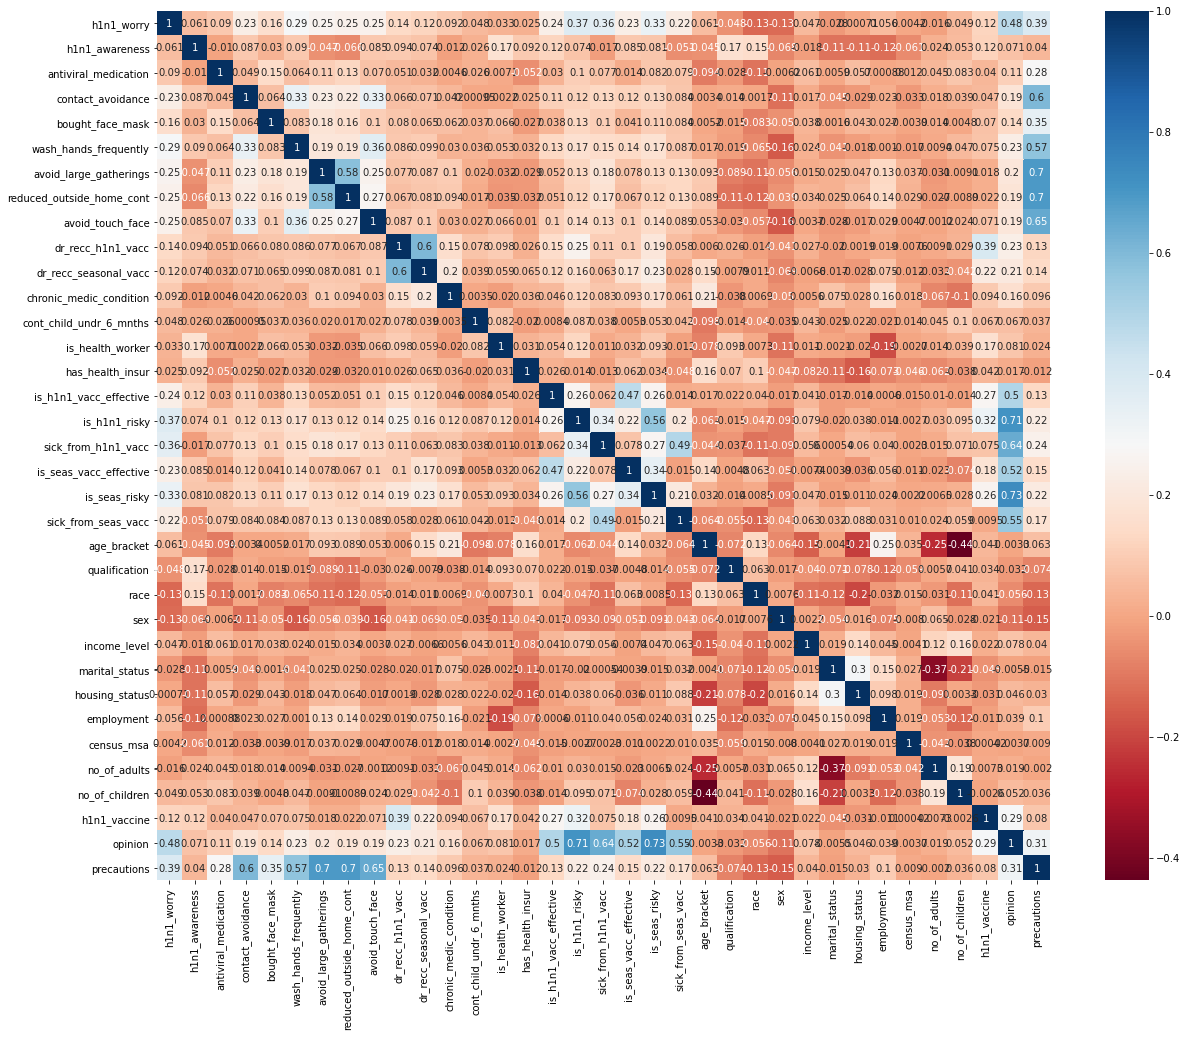

In [76]:
plt.figure(figsize=(20,16))
sns.heatmap(df1.corr(),annot=True,cmap='RdBu')
plt.show()

In [77]:
df1.drop(['is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective',
'is_seas_risky','sick_from_seas_vacc','antiviral_medication','contact_avoidance',
'bought_face_mask','wash_hands_frequently', 'avoid_large_gatherings','reduced_outside_home_cont',
'avoid_touch_face'],axis=1,inplace=True)
df1.shape

(26707, 22)

In [78]:
x1 = df1.drop('h1n1_vaccine',axis=1)
y1 = df1['h1n1_vaccine']
print(x1.shape)
print(y1.shape)
print(x1.columns)

(26707, 21)
(26707,)
Index(['h1n1_worry', 'h1n1_awareness', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur',
       'age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'opinion', 'precautions'],
      dtype='object')


In [79]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.35,random_state=42)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(17359, 21)
(9348, 21)
(17359,)
(9348,)


In [80]:
m3 = LogisticRegression(max_iter=1000)
m3.fit(x_train1,y_train1)
ypred_m3 = m3.predict(x_test1)
print(ypred_m3)

[0 0 0 ... 0 0 1]


In [82]:
gen_metrics(m3,x_train1,x_test1,y_train1,y_test1,ypred_m3)

Training score 0.8244714557290167
Testing score 0.823063756953359
[[6976  385]
 [1269  718]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7361
           1       0.65      0.36      0.46      1987

    accuracy                           0.82      9348
   macro avg       0.75      0.65      0.68      9348
weighted avg       0.80      0.82      0.80      9348



### SGDClassifier

In [68]:
from sklearn.linear_model import SGDClassifier

In [69]:
m4 = SGDClassifier(max_iter=250,eta0=0.001,loss='log')
m4.fit(x_train,y_train)

SGDClassifier(eta0=0.001, loss='log', max_iter=250)

In [70]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[0 0 0 ... 0 0 1]


In [71]:
gen_metrics(m4,x_train,x_test,y_train,y_test,ypred_m4)

Training score 0.8209574284232962
Testing score 0.8221009841677364
[[6493  868]
 [ 795 1192]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7361
           1       0.58      0.60      0.59      1987

    accuracy                           0.82      9348
   macro avg       0.73      0.74      0.74      9348
weighted avg       0.82      0.82      0.82      9348



In [ ]:
# Inference
# Cross Validation
# ROC_AUC - for Logistic
# Feature selection